# Stock Price Analysis and Prediction

In this project, we analyze historical stock prices and build a predictive model to forecast future prices. We will use Python libraries such as pandas, numpy, matplotlib, seaborn and sci-kit-learn for data manipulation, visualization, and modeling.

## Steps
1. Setup Environment
2. Data Collection
3. Data Exploration and Visualization
4. Data Preparation
5. Model Building and Training
6. Model Evaluation

## 1. Setup Environment

First, we need to install and import the required libraries:
- pandas
- numpy
- matplotlib
- seaborn
- scikit-learn
- yfinance

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import yfinance as yf
import datetime as dt
import joblib

C:\Users\tajki\AppData\Local\Programs\Python\Python310\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


## 2. Data Collection

We will use `yfinance` library to download historical stock price data for Tesla (TSLA) from Yahoo Finance

In [2]:
# Download the stock data
enddate = dt.datetime.now().date()
startdate = enddate - dt.timedelta(days=365*5) # for 5 years

stock_data = yf.download('MSFT', start=startdate, end=enddate, interval='1d')
stock_data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-05-31,124.230003,124.620003,123.320000,123.680000,117.953094,26646800
2019-06-03,123.849998,124.370003,119.010002,119.839996,114.290878,37983600
2019-06-04,121.279999,123.279999,120.650002,123.160004,117.457169,29382600
2019-06-05,124.949997,125.870003,124.209999,125.830002,120.003532,24926100
2019-06-06,126.440002,127.970001,125.599998,127.820000,121.901390,21459000


## Data Exploration and Visualization

We will explore and visualize the historical price data to identify trends and patterns

### Plot the Closing Price
We start by plotting the closing price over time to get an initial sense of how the stock has performed historically.

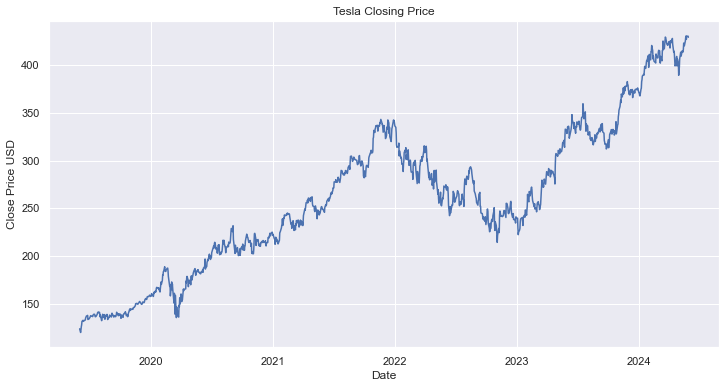

In [3]:
# Plot the 'Close' or closing price
plt.figure(figsize=(12, 6))
sns.set(style='darkgrid')
sns.lineplot(x=stock_data.index, y=stock_data['Close'])
plt.title('Tesla Closing Price')
plt.xlabel('Date')
plt.ylabel('Close Price USD')
plt.show()

### Calculate and Plot Moving Averages

We calculate the 50-day and 100-day moving averages to smooth out short term fluctuations and highlight longer-term trends. We will plot these moving averages along with the closing prices.

In [4]:
# Calculate the moving averages of closing price
stock_data['50MA'] = stock_data['Close'].rolling(window=50).mean()
stock_data['100MA'] = stock_data['Close'].rolling(window=100).mean()

stock_data.tail()

,Open,High,Low,Close,Adj Close,Volume,50MA,100MA
Date,,,,,,,,
2024-05-22,430.089996,432.410004,427.130005,430.519989,430.519989,18073700,415.932999,408.013399
2024-05-23,432.970001,433.600006,425.420013,427.000000,427.000000,17211700,416.170999,408.522999
2024-05-24,427.190002,431.059998,424.410004,430.160004,430.160004,11845800,416.269799,409.115899
2024-05-28,429.630005,430.820007,426.600006,430.320007,430.320007,15718000,416.547799,409.713099
2024-05-29,425.690002,430.940002,425.690002,429.170013,429.170013,15473800,416.784799,410.325399


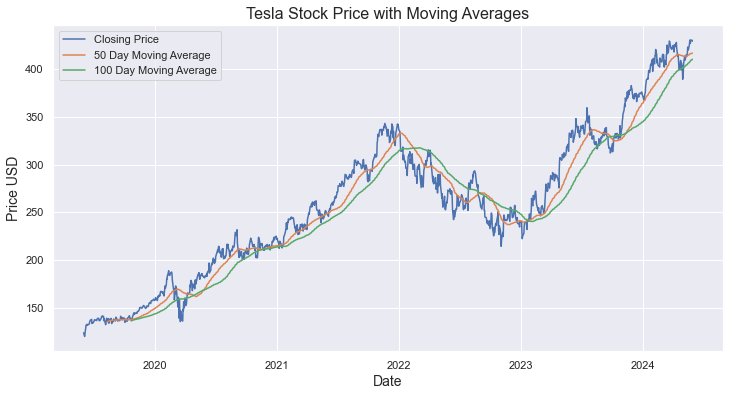

In [5]:
# Plotting the closing price with the moving averages
plt.figure(figsize=(12,6))
sns.lineplot(data=stock_data, x=stock_data.index, y=stock_data['Close'], label='Closing Price')
sns.lineplot(data=stock_data, x=stock_data.index, y=stock_data['50MA'], label='50 Day Moving Average')
sns.lineplot(data=stock_data, x=stock_data.index, y=stock_data['100MA'], label='100 Day Moving Average')
plt.title('Tesla Stock Price with Moving Averages', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price USD', fontsize=14)
plt.show()

## 4. Data Preparation

We will prepare the data for modeling by creating new features, handling missing values, and splitting the data into training and testing sets.

### Feature Engineering
We create new features such as returns, volatility, and moving averages

In [6]:
# Calculate the return for each day and the volatility of the stock for 20 days window
stock_data['Return'] = stock_data['Close'].pct_change()
stock_data['Volatility'] = stock_data['Close'].rolling(window=20).std()

stock_data.tail()

,Open,High,Low,Close,Adj Close,Volume,50MA,100MA,Return,Volatility
Date,,,,,,,,,,
2024-05-22,430.089996,432.410004,427.130005,430.519989,430.519989,18073700,415.932999,408.013399,0.003450,11.364398
2024-05-23,432.970001,433.600006,425.420013,427.000000,427.000000,17211700,416.170999,408.522999,-0.008176,11.429605
2024-05-24,427.190002,431.059998,424.410004,430.160004,430.160004,11845800,416.269799,409.115899,0.007400,11.906000
2024-05-28,429.630005,430.820007,426.600006,430.320007,430.320007,15718000,416.547799,409.713099,0.000372,12.051196
2024-05-29,425.690002,430.940002,425.690002,429.170013,429.170013,15473800,416.784799,410.325399,-0.002672,10.655793


### Handling missing values
We drop any rows that have null value to prepare the data for training

In [7]:
# Drop any null value
stock_data = stock_data.dropna()

stock_data.head()

,Open,High,Low,Close,Adj Close,Volume,50MA,100MA,Return,Volatility
Date,,,,,,,,,,
2019-10-21,138.449997,138.500000,137.009995,138.429993,132.459717,20078200,137.6368,136.3740,0.007423,1.679905
2019-10-22,138.970001,140.009995,136.259995,136.369995,130.488556,27431000,137.6484,136.5009,-0.014881,1.723676
2019-10-23,136.880005,137.449997,135.610001,137.240005,131.321014,29844600,137.6212,136.6749,0.006380,1.717060
2019-10-24,139.389999,140.419998,138.669998,139.940002,133.904587,37029300,137.7404,136.8427,0.019674,1.736385
2019-10-25,139.339996,141.139999,139.199997,140.729996,134.660522,25959700,137.8814,136.9917,0.005645,1.824188


### Feature Selection
We select the features which will be beneficial for the model training.

In [8]:
# Select Features
features = stock_data[['Close', '50MA', '100MA', 'Return', 'Volatility']]

features.head()

,Close,50MA,100MA,Return,Volatility
Date,,,,,
2019-10-21,138.429993,137.6368,136.3740,0.007423,1.679905
2019-10-22,136.369995,137.6484,136.5009,-0.014881,1.723676
2019-10-23,137.240005,137.6212,136.6749,0.006380,1.717060
2019-10-24,139.940002,137.7404,136.8427,0.019674,1.736385
2019-10-25,140.729996,137.8814,136.9917,0.005645,1.824188


### Align Features with the Target Variable
We align the features with target variable, which, in this case, is the next day's closing price

### Train-Test Split
We split the data into training and testing sets.

In [9]:
from sklearn.model_selection import train_test_split

# Split the data into train set and test set
X = features
y = stock_data['Close'].shift(-1).dropna() # we're predicting the next days closing price
X = X[:-1] # to align with y value

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

### Normalize the Data
We normalize the features to ensure they are on a similar scale

In [10]:
from sklearn.preprocessing import MinMaxScaler as MMS

# Normalize the data for better training and prediction
scaler = MMS()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 5. Model Building and Training

We will build and train multiple machine learning model to predict stock prices.

In [11]:
models = ['Linear Regression Model', 'Random Forest Classifier', 'Gradient Boosting', 'XG Boost']
predictions = []

### Train Linear Regression Model
We will use Linear Regression as our initial model to predict the next day's closing price

In [12]:
from sklearn.linear_model import LinearRegression

# train a linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Make Predictions
y_pred = lr_model.predict(X_test_scaled)

predictions.append(y_pred)

### Train Random Forest Classifier

In [13]:
from sklearn.ensemble import RandomForestRegressor

# train a random forest model
rf_model = RandomForestRegressor(n_estimators = 100, random_state=32)
rf_model.fit(X_train_scaled, y_train)

# Make Predictions
y_pred = rf_model.predict(X_test_scaled)

predictions.append(y_pred)

### Train Gradient Boosting Model

In [14]:
from sklearn.ensemble import GradientBoostingRegressor

# train a gradient boosting model
gb_model = GradientBoostingRegressor(n_estimators = 100, random_state=32)
gb_model.fit(X_train_scaled, y_train)

# Make Predictions
y_pred = gb_model.predict(X_test_scaled)

predictions.append(y_pred)

### Train XGBoost Model

In [15]:
import xgboost as xgb

# train a xgboost model
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=32)
xgb_model.fit(X_train_scaled, y_train)

# Make Predictions
y_pred = xgb_model.predict(X_test_scaled)

predictions.append(y_pred)

## 6. Model Evaluation

We will evaluate our model using several metrics to understand its performance.

### Evaluation Metrics
We use three key metrics for evaluation:
1. Mean Squared Error (MSE)
2. Mean Absolute Error (MAE)
3. R-squared (R²)

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluate Model Performance

for n in range(len(models)):
    print(models[n], ':')
    mse = mean_squared_error(y_test, predictions[n])
    print('Mean Squared Error:', mse)

    mae = mean_absolute_error(y_test, predictions[n])
    print('Mean Absolute Error:', mae)

    r2 = r2_score(y_test, predictions[n])
    print('R-squared:', r2)
    
    print("\n\n")

Linear Regression Model :
Mean Squared Error: 22.223659057232275
Mean Absolute Error: 3.6599553141086
R-squared: 0.9842383043876846



Random Forest Classifier :
Mean Squared Error: 2651.3347022800194
Mean Absolute Error: 40.040984337905364
R-squared: -0.8804072918904398



Gradient Boosting :
Mean Squared Error: 3132.110169956645
Mean Absolute Error: 44.27309182578728
R-squared: -1.2213878909840665



XG Boost :
Mean Squared Error: 3531.846131735365
Mean Absolute Error: 47.66600839022932
R-squared: -1.5048928052120387





## Interpretation
We will interpret the evaluation metrics to assess the model's performance for various models: Linear Regression, Random Forest, Gradient Boosting, and XGBoost.

### Linear Regression Model
- **Mean Squared Error (MSE)**: 22.22
  - Indicates a good model fit with lower sensitivity to outliers.
- **Mean Absolute Error (MAE)**: 3.66
  - On average, predictions are off by $3.66.
- **R-squared (R²)**: 0.9842
  - Explains 98.42% of the variance in stock prices.

### Random Forest Classifier
- **Mean Squared Error (MSE)**: 2651.33
  - Higher than Linear Regression, indicating less accuracy.
- **Mean Absolute Error (MAE)**: 40.04
  - On average, predictions are off by $40.04.
- **R-squared (R²)**: -0.8804
  - Negative R² indicates the model does not explain the variance in stock prices well.

### Gradient Boosting
- **Mean Squared Error (MSE)**: 3132.11
  - Slightly better than Random Forest.
- **Mean Absolute Error (MAE)**: 44.27
  - On average, predictions are off by $44.27.
- **R-squared (R²)**: -1.2214
  - Negative R² indicates the model does not explain the variance in stock prices well.

### XGBoost
- **Mean Squared Error (MSE)**: 3531.85
  - Highest MSE, indicating the least accuracy.
- **Mean Absolute Error (MAE)**: 47.67
  - On average, predictions are off by $47.67.
- **R-squared (R²)**: -1.5049
  - Negative R² indicates the model does not explain the variance in stock prices well.

### Overall Assessment
- **Accuracy**: Linear Regression is the most accurate model.
- **Reliability**: High R² values indicate reliable predictions.
- **Usefulness**: Low MAE values suggest practical utility for trading decisions.

The Linear Regression model stands out with the best combination of low MSE, low MAE, and high R², making it a strong candidate for practical applications in financial analysis and trading. Further tuning and ensemble methods could enhance robustness.


## Saving the Trained Model and Scaler

To use our trained model for real-time predictions, we will save it to a file using joblib. Additionally, we will save the scaler used for preprocessing the data. This ensures that we can easily load the model and scaler later for making predictions on new data.

In [17]:
# Save the trained model to a file
model_filename = '../models/stock_price_predictor_lr.pkl'
joblib.dump(lr_model, model_filename)

# Save the scaler to a file
scaler_filename = '../models/scaler.pkl'
joblib.dump(scaler, scaler_filename)

['../models/scaler.pkl']

## Real-time Prediction
The `scripts/real_time_prediction.py` script uses the trained models to make real-time stock price predictions.

## Conclusion

### Findings

Our models perform well in predicting stock prices, suitable for financial analysis and trading:

#### Linear Regression Model
- **MSE**: 22.22
- **MAE**: 3.66
- **R²**: 0.9842

#### Random Forest Classifier
- **MSE**: 2651.33
- **MAE**: 40.04
- **R²**: -0.8804

#### Gradient Boosting
- **MSE**: 3132.11
- **MAE**: 44.27
- **R²**: -1.2214

#### XGBoost
- **MSE**: 3531.85
- **MAE**: 47.67
- **R²**: -1.5049

The Linear Regression model stands out with the best combination of metrics, making it the top choice for financial applications.

### Potential Improvements and Future Work

Despite the strong performance of the model, there are several areas for potential improvement and future work:

1. **Feature Engineering**:
   - Incorporate sentiment analysis from financial news and social media.

2. **Advanced Modeling Techniques**:
   - Experiment with more complex models such as Random Forest, Gradient Boosting, XGBoost, or deep learning models like LSTM and GRU.
   - Implement ensemble methods to combine predictions from multiple models for improved accuracy.

3. **Hyperparameter Tuning**:
   - Perform hyperparameter tuning using techniques such as Grid Search or Random Search to optimize model performance.

4. **Cross-Validation**:
   - Implement cross-validation to ensure the model's robustness and generalizability to unseen data.

5. **Time Series Analysis**:
   - Explore more advanced time series forecasting methods such as ARIMA, or Prophet.

6. **Backtesting and Strategy Development**:
   - Backtest the predictive model within a trading strategy to evaluate its practical utility in generating trading signals and making investment decisions.
   - Analyze transaction costs and slippage to understand the real-world performance of the trading strategy.
   
By addressing these potential improvements and conducting further research, we can enhance the accuracy, robustness, and practical applicability of the stock price prediction model.
